### Predicting Heart Diease Using Machine Learning 

This Notebook Looks Into Using Various Python-Based Machine Learning And Data Science Liabraries In An Attempt To Build A Machine Learning Model
Capable Of Predicting Whether Or Not Someone Has Heart Diease Based On Their Medical Attirbutes  

**We Are Going To Take The Following Approach**
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Expirmentation

## 1.0 Problem Definition

In A Statement
> Given Clinical Parameters About A Patient Can We Predict Whether Or Not They Have Heart Diease


## 2.0 Data

The Original Data Came From The Cleveland Data From The UCI Machine Learning Repositery:
https://archive.ics.uci.edu/dataset/45/heart+disease

There Is Also A Version Available On Kaggle:
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3.0 Evaluation

> If We Can Reach 95% Accuracy At Our Predictions During The Proof Of Concept We We'll Pursue The Project

## 4.0 Features

**Create Data Dictionary**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 reversable defect
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing The Tools

We're Going To Use Pandas, Matplotlib, And Numpy For Data Manipulation And Analysis

In [75]:
#Import All The Tools We Need

#Regular EDA (Exploretory Data Analysis) And Plotting Libararies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models From Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score, recall_score, RocCurveDisplay, roc_curve, auc, ConfusionMatrixDisplay

## Data

In [3]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (Also Known As Exploretory Data Analysis Or EDA)

The Goal Here Is To Find Out More About The Data And Become A Subject Matter Expert On The Dataset Were Working On

1. What Question(s) Are We Trying To Solve?
2. What Kind Of Data Do We Have And How Do We Treat Different Types?
3. Whats Missing From The Data And How Do You Deal With It?
4. Where Are The Outliers And Why Should We Care About Them?
5. How Can We Add, Change Or Remove Features To Get More From Our Data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Lets Find Out How Many Of Each Class There Are 
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

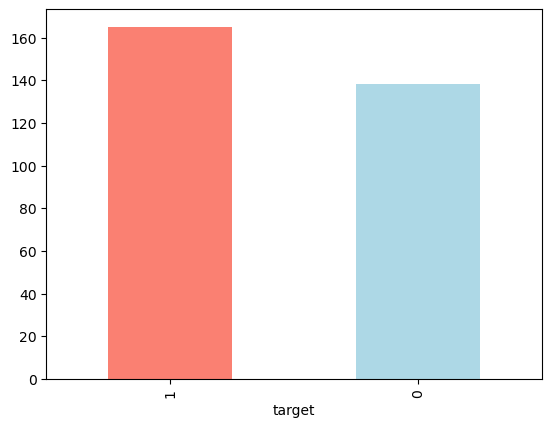

In [6]:
df["target"].value_counts().plot(kind="bar",color=["salmon", "lightblue"])
plt.show();

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#Are There Any Missing Values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Diease Frequency According To Sex

In [10]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
#Compare The Sex Column To The Target Column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


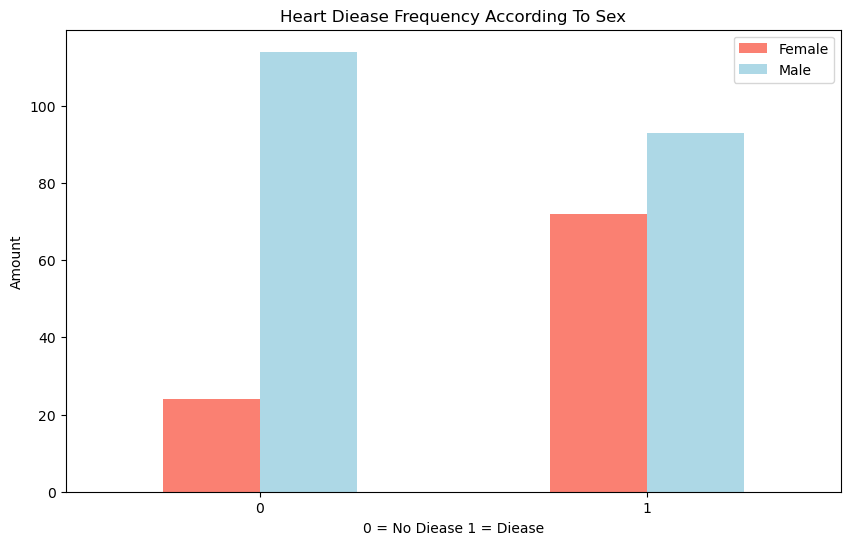

In [12]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);
plt.title("Heart Diease Frequency According To Sex")
plt.xlabel("0 = No Diease 1 = Diease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show()

## Age Vs Max Heart Rate For Heart Diease

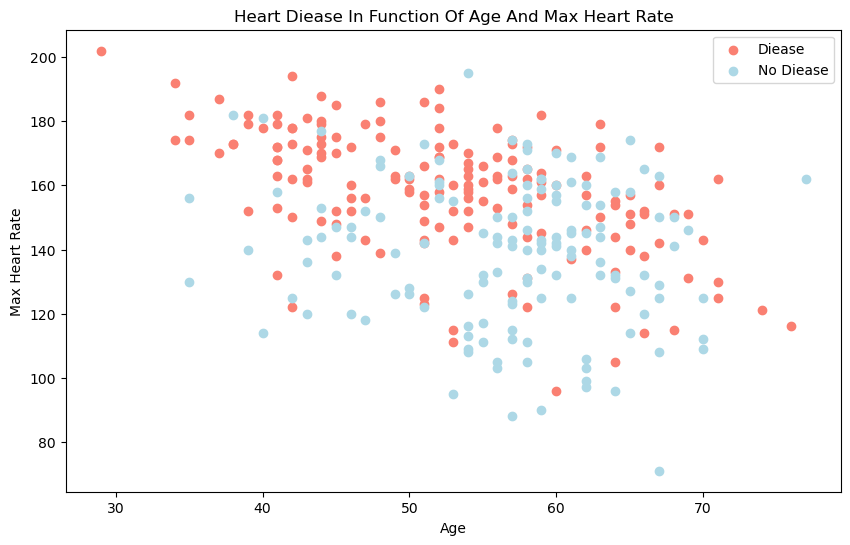

In [13]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color=["salmon"])
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color=["lightblue"])
plt.title("Heart Diease In Function Of Age And Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Diease", "No Diease"])
plt.show()

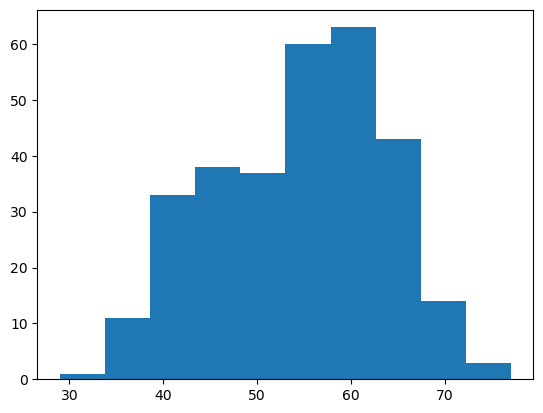

In [14]:
#Check The Distribution Of The Age Column
plt.hist(df.age)
plt.show();

### Heart Diease Frequency According To Chest Pain Type

cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


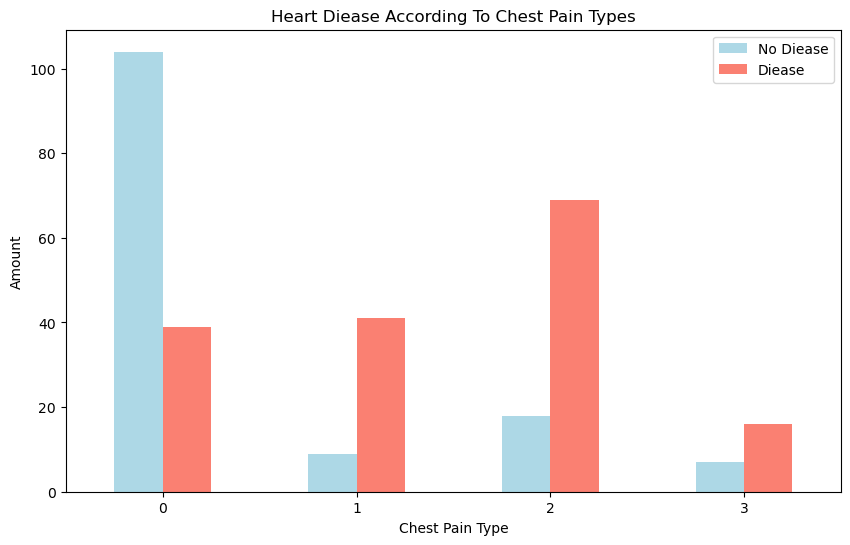

In [16]:
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["lightblue", "salmon"], figsize=(10,6))
plt.title("Heart Diease According To Chest Pain Types")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Diease", "Diease"])
plt.xticks(rotation=0)
plt.show();

In [17]:
# Make A Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


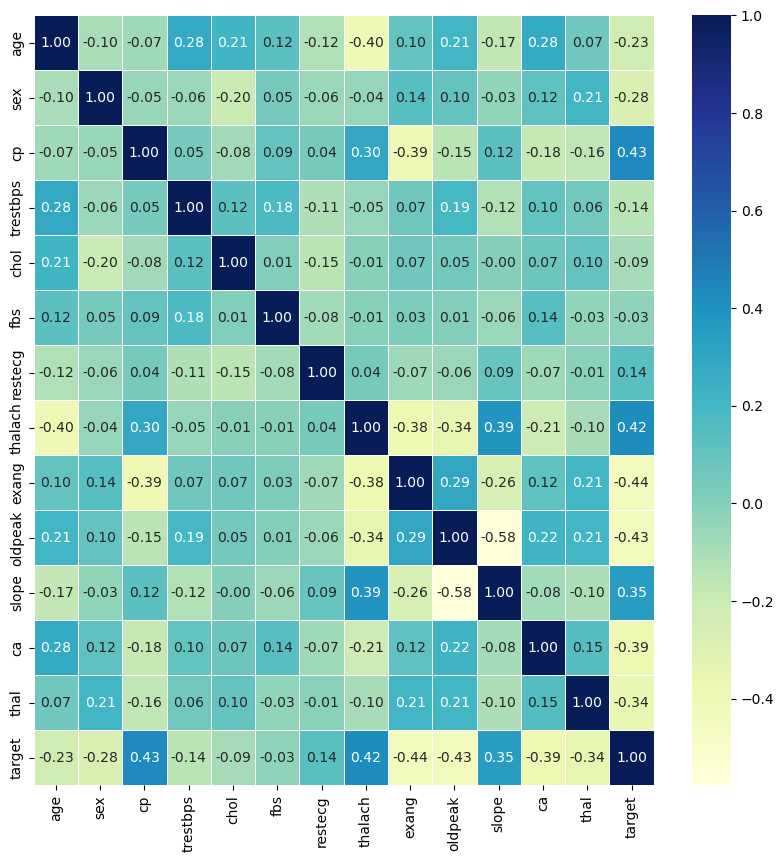

In [18]:
#Lets Make Our Correlation Metrix A Little More Visually Appealing
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu"
                 )
plt.show()

## 5.0 Modeling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
#Split Into X & y
X = df.drop("target", axis=1)
y = df["target"]

#Set Random Seed
np.random.seed(42)

#Split The Data To Training And Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [21]:
#Put Models In Dictionary 

models = {
          "LogisticRegression":LogisticRegression(),
          "KNeighborsClassifier": KNeighborsClassifier(),
          "RandomForestClassifier":RandomForestClassifier()
}

#Create Function To Use All Models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Takes A Dictionary Of Models, As Well As Train And Testing Data 

    Example For Dictionary:
        models = {
              "LogisticRegression":LogisticRegression(),
              "KNeighborsClassifier": KNeighborsClassifier(),
        }
    """
    #Set Random Seed
    np.random.seed(42)
    
    #Make A Dict To Keep Model Scores
    model_scores = {}
    #Loop Through Models
    for name, model in models.items():
        #Fit The Model To The Data
        model.fit(X_train, y_train)
        #Evaluate The Model And Append Score To Model Score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
    

In [22]:
# Now We Need To Build Our Machine Learning Model
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

C:\Users\shale\Data_Sience\Heart_Diease_Proj\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

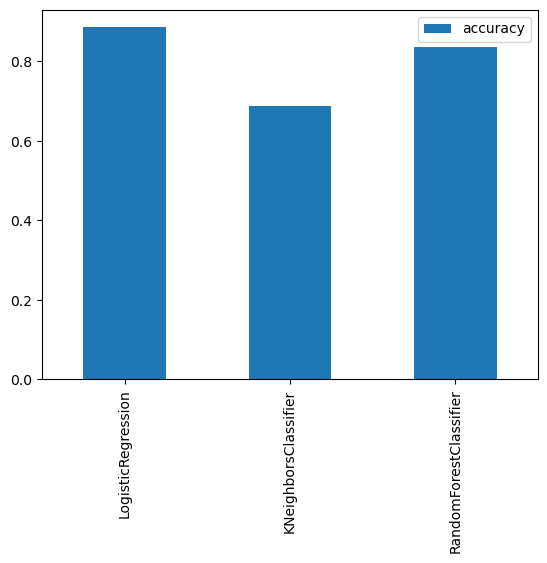

In [24]:
#Comparing Models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.show();

### HyperParameter Tuning

In [25]:
#Lets Tune KNN

train_scores = []
test_scores = []

#Create A List Of Different HyperParameters
neighbors = range(1,21)

#Setup KNN Instance
knn = KNeighborsClassifier()

#Loop Through Different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [26]:
max(train_scores)

1.0

In [27]:
max(test_scores)

0.7540983606557377

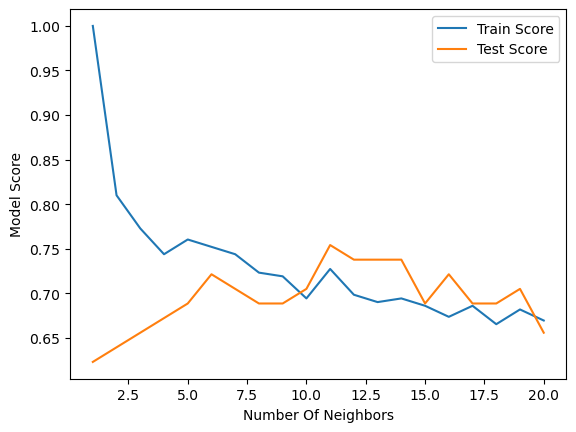

In [28]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.show()

## HyperParameter Tuning With RandomizedSearchCV

We're Going To Tune Our RandomForestClassifier And LogisticRegression Using RandomSearchCV

In [60]:
#Create A Grid For RandomForestClassifier And LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]
}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20 , 2),
           "min_samples_leaf": np.arange(1, 20 ,2)
}

In [62]:
#Tune LogisticRegression

np.random.seed(42)

#Setup Random HyperParameter Search For Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#Fit Random HyperParameter Search Model For LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [63]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [64]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [41]:
#Tune RandomForestClassifier

np.random.seed(42)

#Setup Random HyperParameter Search For RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#Fit Random HyperParameter Search Model For LogisticRegression
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [43]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## HyperParameters Tunning  Using GridSearchCV

In [68]:
#Different HyperParameters For Our LogisiticRegression Model
log_reg_grid = {"C": np.logspace(-4, 4 ,30),
                "solver":["liblinear"],
}

#Setup Grid HyperParameter Search For LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [69]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [70]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluting Our Model Beyond Accuray

* ROC & AOC
* Confusion Matrix
* Classification Report
* Precision
* F1-Score
* Recall

In [73]:
#Make Predictions To Enable The Use Of All Evaluation Functions
y_preds = gs_log_reg.predict(X_test)

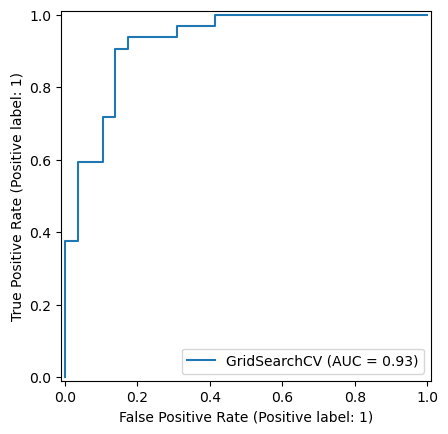

In [87]:
#from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test); 
plt.show();

In [95]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[25,  4],
       [ 3, 29]], dtype=int64)

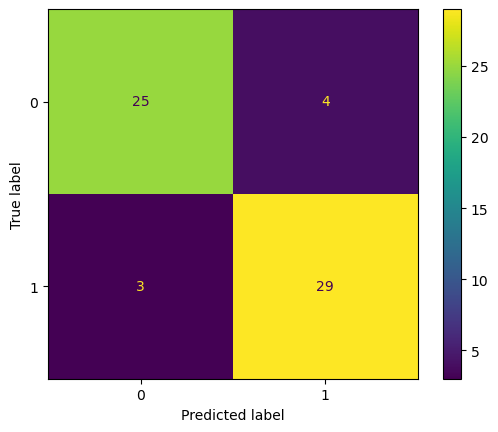

In [96]:
disp = ConfusionMatrixDisplay(cm, display_labels=gs_log_reg.classes_)
disp.plot()
plt.show()

In [97]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [100]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [108]:
#Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [112]:
#Cross Validated Accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [114]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [115]:
#Cross Validated Precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")

cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [117]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [118]:
#Cross Validated Recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")

cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [119]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [120]:
#Cross Validated f1
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")

cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [122]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

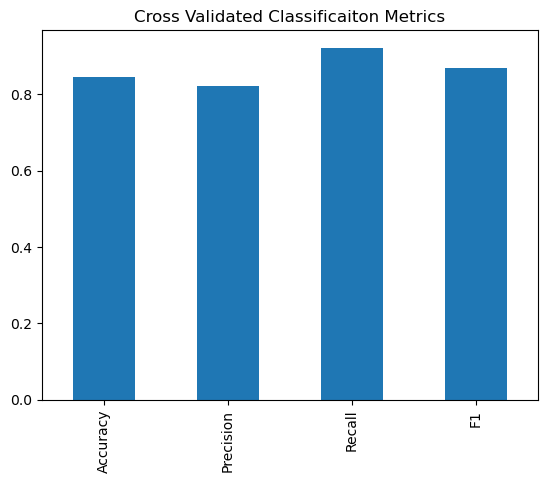

In [127]:
#Visualize Our Cross Validated Metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title="Cross Validated Classificaiton Metrics",
                      legend=False)
plt.show();

### Feature Importance

Feature Importance Is Another Way Of Asking Which Features Contributed The Most To The Outcomes Of The Model And How Did They Contribute

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [131]:
#Fit An Instance Of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')
clf.fit(X_train,y_train);

In [133]:
#Check coef_
clf.coef_

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [134]:
#Match The Coefs Of Features To Columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672769574500135,
 'sex': -0.8604461876509621,
 'cp': 0.6606705956911073,
 'trestbps': -0.011569931563712749,
 'chol': -0.0016637424209784567,
 'fbs': 0.04386123481544026,
 'restecg': 0.3127581278171948,
 'thalach': 0.02459361107844528,
 'exang': -0.6041306062020464,
 'oldpeak': -0.5686283181245352,
 'slope': 0.4505162370054866,
 'ca': -0.6360987949056705,
 'thal': -0.6766338344951353}

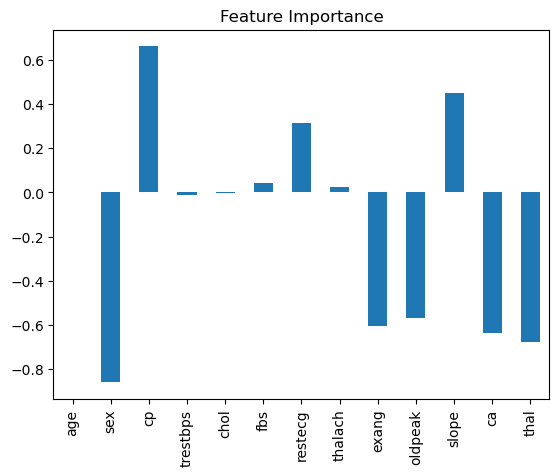

In [137]:
#Visualize Feature Imporatance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)
plt.show();

In [138]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [139]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## 6. Experimentation
If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) export it and share it with others